In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [48]:
df = pd.read_csv('wine.csv')

# .values to change to NumPy array
x = df.iloc[:, 1:].values
y = df.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size=0.1, stratify=y)


Appy standardization to our dataset.

In [49]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


Appy PCA for dimension reduction.

In [50]:
pca = PCA(n_components=5)
pca.fit(x_train)

print('explained variance: ', pca.explained_variance_ratio_)
print('explained variance: ', pca.explained_variance_ratio_.sum())


explained variance:  [0.36532629 0.20241021 0.10062876 0.07364481 0.06390404]
explained variance:  0.8059141146304288


Transform both our Training and Test data using the fitted PCA model.

In [51]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)


Re-label our labels to start from 0 (required by to_categorical() function).

In [52]:
le = LabelEncoder()
le.fit(y)

le.classes_

array([1, 2, 3])

Print our labels into encoded categorical numbers.

In [53]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

print(y_train)
print(y_test)

[1 1 1 1 1 0 2 1 1 0 0 1 1 1 2 2 1 2 1 0 1 1 1 0 1 2 1 1 2 0 0 0 1 2 0 1 0
 1 0 0 1 0 1 2 1 1 1 0 2 0 0 0 0 2 1 1 1 0 1 2 0 0 2 2 0 0 1 2 1 0 2 1 2 2
 1 0 2 0 0 0 1 1 2 1 0 0 1 1 2 1 0 1 1 2 2 0 0 0 1 1 1 1 1 0 1 1 0 2 0 2 1
 1 1 0 2 0 2 2 0 1 0 2 2 2 2 2 2 1 2 0 1 0 0 2 1 0 1 1 0 2 0 0 2 0 2 1 2 1
 1 1 1 0 2 2 1 0 0 2 0 2]
[1 2 1 2 0 1 2 0 0 1 0 1 0 2 0 1 2 1]


Perform One-Hot Encoding on our categorical numbers.

In [54]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

print(y_train)
print(y_test)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0.

Create the model.

In [55]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Training the model.

In [56]:
history = model.fit(x_train, y_train, epochs=300)

Train on 160 samples
Epoch 1/300
160/160 [==============================] - 0s 158us/sample - loss: 1.3049 - acc: 0.1375
Epoch 2/300
160/160 [==============================] - 0s 22us/sample - loss: 1.1549 - acc: 0.2438
Epoch 3/300
160/160 [==============================] - 0s 21us/sample - loss: 1.0166 - acc: 0.3625
Epoch 4/300
160/160 [==============================] - 0s 21us/sample - loss: 0.8983 - acc: 0.6938
Epoch 5/300
160/160 [==============================] - 0s 20us/sample - loss: 0.7914 - acc: 0.8375
Epoch 6/300
160/160 [==============================] - 0s 20us/sample - loss: 0.6991 - acc: 0.8875
Epoch 7/300
160/160 [==============================] - 0s 21us/sample - loss: 0.6205 - acc: 0.8938
Epoch 8/300
160/160 [==============================] - 0s 20us/sample - loss: 0.5524 - acc: 0.9062
Epoch 9/300
160/160 [==============================] - 0s 21us/sample - loss: 0.4953 - acc: 0.9250
Epoch 10/300
160/160 [==============================] - 0s 20us/sample - loss: 0.4436 -

Plot our "loss" and "accuracy" graphs.

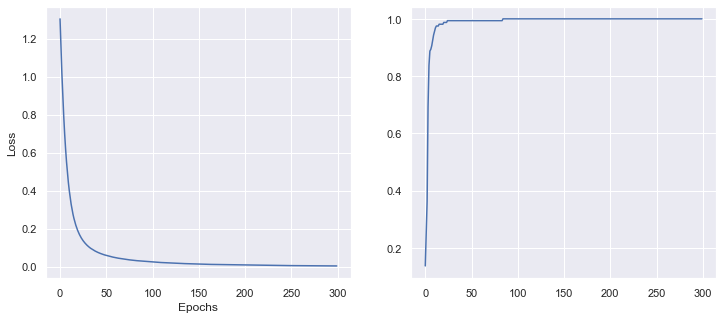

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(history.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(history.history['acc'])



plt.show()


Perform auto evaluation.

In [58]:
loss, accuracy = model.evaluate(x=x_test, y=y_test)

print('loss = ', loss)
print('accuracy = ', accuracy)

loss =  0.00791211612522602
accuracy =  1.0


/Users/cherwah/python37_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2366: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Perform simple manual inspection.

In [59]:
predictions = model.predict(x=x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])

Actual:  [0. 1. 0.] Predicted:  [1.2997748e-06 9.9999845e-01 2.4112765e-07]
Actual:  [0. 0. 1.] Predicted:  [4.3700527e-07 2.9297106e-10 9.9999952e-01]
Actual:  [0. 1. 0.] Predicted:  [2.9763338e-04 9.9969947e-01 2.9903001e-06]
Actual:  [0. 0. 1.] Predicted:  [1.4523326e-05 5.7259724e-05 9.9992824e-01]
Actual:  [1. 0. 0.] Predicted:  [9.9999690e-01 9.2532924e-09 3.0759445e-06]
Actual:  [0. 1. 0.] Predicted:  [1.8993311e-05 9.9998093e-01 1.4348542e-07]
Actual:  [0. 0. 1.] Predicted:  [2.3574512e-06 2.1432650e-05 9.9997616e-01]
Actual:  [1. 0. 0.] Predicted:  [9.9999249e-01 5.9669114e-09 7.4657601e-06]
Actual:  [1. 0. 0.] Predicted:  [9.3554270e-01 6.4024828e-02 4.3253152e-04]
Actual:  [0. 1. 0.] Predicted:  [6.3710868e-02 9.3624318e-01 4.5975885e-05]
Actual:  [1. 0. 0.] Predicted:  [9.9999619e-01 1.2063273e-07 3.7506557e-06]
Actual:  [0. 1. 0.] Predicted:  [7.1117115e-06 9.9867308e-01 1.3197490e-03]
Actual:  [1. 0. 0.] Predicted:  [9.9992073e-01 8.7234461e-08 7.9203724e-05]
Actual:  [0.

In [60]:
n_preds = len(predictions)

correct = 0
wrong = 0

for i in np.arange(n_preds):
    pred_max = np.argmax(predictions[i])
    actual_max = np.argmax(y_test[i])
    if pred_max == actual_max:
        correct += 1
    else:
        wrong += 1

print('correct =', correct, ', wrong =', wrong)
print('accuracy = ', correct/n_preds)


correct = 18
wrong =  0
accuracy =  1.0
